In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df = pd.read_json('watch_history31.json')
print(df.columns)
df.head()

Index(['header', 'title', 'titleUrl', 'subtitles', 'time', 'products',
       'activityControls', 'description', 'details'],
      dtype='object')


header                                              title  \
0  YouTube  HER ŞEYİ HACKLEYEN CİHAZ! Flipper Zero adlı vi...   
1  YouTube  WEBTEKNO'DAN AYRILDIM. Her Şeyi Anlatıyorum! a...   
2  YouTube  Armut Dalda Asılsın Y** Başı Nasılsın - oguzsa...   
3  YouTube  OĞUZ SASİ vs GOOGLE SESLİ ARAMA adlı videoyu i...   
4  YouTube  EEEEN İLGİNÇ YURT DIŞI ABUR CUBURLARINI GÖMDÜK...   

                                      titleUrl  \
0  https://www.youtube.com/watch?v=enTiK-dZmIQ   
1  https://www.youtube.com/watch?v=Y_SjBtw07Pc   
2  https://www.youtube.com/watch?v=vcDspIdL4UM   
3  https://www.youtube.com/watch?v=lRq0IDttcA4   
4  https://www.youtube.com/watch?v=g_tZeGroTkI   

                                           subtitles  \
0  [{'name': 'Merdan Kocaoğlu', 'url': 'https://w...   
1  [{'name': 'Merdan Kocaoğlu', 'url': 'https://w...   
2  [{'name': 'ACTENS', 'url': 'https://www.youtub...   
3  [{'name': 'minilone hd', 'url': 'https://www.y...   
4  [{'name': 'Tuna Tavus', 'url': 'https://www.yo...   

                       time   products          activityControls description  \
0  2024-01-17T06:52:40.244Z  [YouTube]  [YouTube izleme geçmişi]         NaN   
1  2024-01-17T06:51:49.663Z  [YouTube]  [YouTube izleme geçmişi]         NaN   
2  2024-01-17T06:51:24.616Z  [YouTube]  [YouTube izleme geçmişi]         NaN   
3  2024-01-17T06:51:07.761Z  [YouTube]  [YouTube izleme geçmişi]         NaN   
4  2024-01-17T06:07:18.111Z  [YouTube]  [YouTube izleme geçmişi]         NaN   

  details  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [2]:
import pandas as pd

# Load data
df = pd.read_json('watch_history31.json')
print("After loading data:")
print(df.head())

columns_to_drop = ['header', 'products', 'activityControls']
for col in columns_to_drop:
    if col not in df.columns:
        print(f"Column {col} does not exist in DataFrame")

df = df.drop(columns_to_drop, axis=1, errors='ignore')  
print("After dropping columns:")
print(df.head())

After loading data:
    header                                              title  \
0  YouTube  HER ŞEYİ HACKLEYEN CİHAZ! Flipper Zero adlı vi...   
1  YouTube  WEBTEKNO'DAN AYRILDIM. Her Şeyi Anlatıyorum! a...   
2  YouTube  Armut Dalda Asılsın Y** Başı Nasılsın - oguzsa...   
3  YouTube  OĞUZ SASİ vs GOOGLE SESLİ ARAMA adlı videoyu i...   
4  YouTube  EEEEN İLGİNÇ YURT DIŞI ABUR CUBURLARINI GÖMDÜK...   

                                      titleUrl  \
0  https://www.youtube.com/watch?v=enTiK-dZmIQ   
1  https://www.youtube.com/watch?v=Y_SjBtw07Pc   
2  https://www.youtube.com/watch?v=vcDspIdL4UM   
3  https://www.youtube.com/watch?v=lRq0IDttcA4   
4  https://www.youtube.com/watch?v=g_tZeGroTkI   

                                           subtitles  \
0  [{'name': 'Merdan Kocaoğlu', 'url': 'https://w...   
1  [{'name': 'Merdan Kocaoğlu', 'url': 'https://w...   
2  [{'name': 'ACTENS', 'url': 'https://www.youtub...   
3  [{'name': 'minilone hd', 'url': 'https://www.y...   
4  [{'na

In [3]:
df = df.drop(['description', 'details'],axis=1)
df['time']=df['time'].apply(pd.to_datetime)

In [4]:
#month_mapping = {
#    'Oca': 'Jan', 'Şub': 'Feb', 'Mar': 'Mar', 'Nis': 'Apr',
#    'May': 'May', 'Haz': 'Jun', 'Tem': 'Jul', 'Ağu': 'Aug',
#    'Eyl': 'Sep', 'Eki': 'Oct', 'Kas': 'Nov', 'Ara': 'Dec'
#}
#df_date['Watched Date Time'] = pd.to_datetime(df_dates['Watched Date Time'].str[:-4], format='%d %b %Y %H:%M:%S', errors='coerce')
#df_dates['Watched Date Time'] = hist_tree['Watched Date Time'].replace(month_mapping, regex=True)
#Divide into year, month, day, hour, min, sec, etc.
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.strftime('%H:00')
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second
df['dayname'] = df['time'].dt.day_name()
df['weekend'] = df['time'].dt.day_name().isin(['Saturday','Sunday'])
df = df.dropna().reset_index(drop=True)


In [5]:
if 'subtitles' in df.columns:
    split_df = df.subtitles.astype(str).str.split(",", regex=True, expand=True)
    if split_df.shape[1] > 0:  # Check if at least one column is created
        df['subtitles'] = split_df[0]
    else:
        
        df['subtitles'] = np.nan  # Example: setting NaN
else:
    
    print("'subtitles' column not found in DataFrame")
df.subtitles.astype(str).str.removeprefix("[{'name': ")
df.subtitles = df.subtitles.astype(str).str.removeprefix("[{'name': ")
df.subtitles = df.subtitles.astype(str).str.removeprefix("'").str.removeprefix('"')
df.subtitles = df.subtitles.astype(str).str.removesuffix("'").str.removesuffix('"')
df.head()

title  \
0  HER ŞEYİ HACKLEYEN CİHAZ! Flipper Zero adlı vi...   
1  WEBTEKNO'DAN AYRILDIM. Her Şeyi Anlatıyorum! a...   
2  Armut Dalda Asılsın Y** Başı Nasılsın - oguzsa...   
3  OĞUZ SASİ vs GOOGLE SESLİ ARAMA adlı videoyu i...   
4  EEEEN İLGİNÇ YURT DIŞI ABUR CUBURLARINI GÖMDÜK...   

                                      titleUrl        subtitles  \
0  https://www.youtube.com/watch?v=enTiK-dZmIQ  Merdan Kocaoğlu   
1  https://www.youtube.com/watch?v=Y_SjBtw07Pc  Merdan Kocaoğlu   
2  https://www.youtube.com/watch?v=vcDspIdL4UM           ACTENS   
3  https://www.youtube.com/watch?v=lRq0IDttcA4      minilone hd   
4  https://www.youtube.com/watch?v=g_tZeGroTkI       Tuna Tavus   

                              time  year  month  day   hour  minute  second  \
0 2024-01-17 06:52:40.244000+00:00  2024      1   17  06:00      52      40   
1 2024-01-17 06:51:49.663000+00:00  2024      1   17  06:00      51      49   
2 2024-01-17 06:51:24.616000+00:00  2024      1   17  06:00      51      24   
3 2024-01-17 06:51:07.761000+00:00  2024      1   17  06:00      51       7   
4 2024-01-17 06:07:18.111000+00:00  2024      1   17  06:00       7      18   

     dayname  weekend  
0  Wednesday    False  
1  Wednesday    False  
2  Wednesday    False  
3  Wednesday    False  
4  Wednesday    False

In [6]:
df = df.rename(columns={'title':'Video Title', 'titleUrl':'Video URL', 'subtitles':'Youtube Channel'})
df.head()

Video Title  \
0  HER ŞEYİ HACKLEYEN CİHAZ! Flipper Zero adlı vi...   
1  WEBTEKNO'DAN AYRILDIM. Her Şeyi Anlatıyorum! a...   
2  Armut Dalda Asılsın Y** Başı Nasılsın - oguzsa...   
3  OĞUZ SASİ vs GOOGLE SESLİ ARAMA adlı videoyu i...   
4  EEEEN İLGİNÇ YURT DIŞI ABUR CUBURLARINI GÖMDÜK...   

                                     Video URL  Youtube Channel  \
0  https://www.youtube.com/watch?v=enTiK-dZmIQ  Merdan Kocaoğlu   
1  https://www.youtube.com/watch?v=Y_SjBtw07Pc  Merdan Kocaoğlu   
2  https://www.youtube.com/watch?v=vcDspIdL4UM           ACTENS   
3  https://www.youtube.com/watch?v=lRq0IDttcA4      minilone hd   
4  https://www.youtube.com/watch?v=g_tZeGroTkI       Tuna Tavus   

                              time  year  month  day   hour  minute  second  \
0 2024-01-17 06:52:40.244000+00:00  2024      1   17  06:00      52      40   
1 2024-01-17 06:51:49.663000+00:00  2024      1   17  06:00      51      49   
2 2024-01-17 06:51:24.616000+00:00  2024      1   17  06:00      51      24   
3 2024-01-17 06:51:07.761000+00:00  2024      1   17  06:00      51       7   
4 2024-01-17 06:07:18.111000+00:00  2024      1   17  06:00       7      18   

     dayname  weekend  
0  Wednesday    False  
1  Wednesday    False  
2  Wednesday    False  
3  Wednesday    False  
4  Wednesday    False

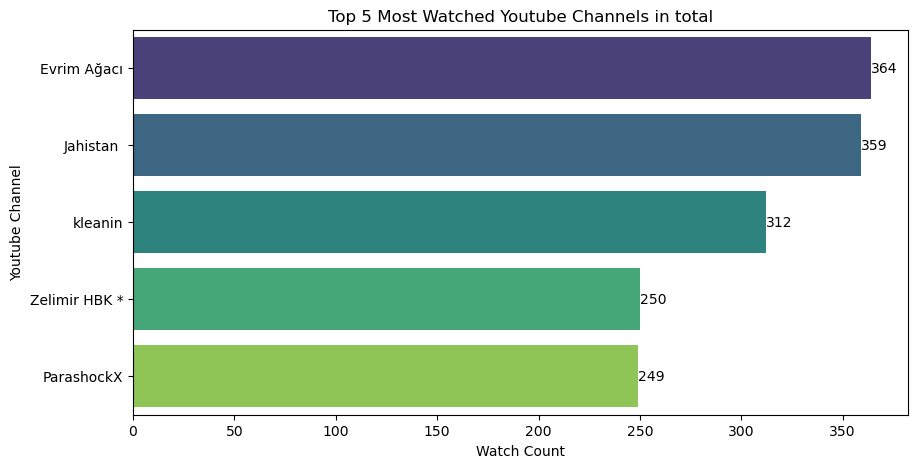

In [7]:


# Count occurrences of each YouTube channel and get the top 5
channel_counts = df['Youtube Channel'].value_counts().head(5)

# Plot the data using a horizontal bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=channel_counts, y=channel_counts.index, palette='viridis')

# Set the labels and title of the plot
ax.set(ylabel='Youtube Channel', xlabel='Watch Count', title='Top 5 Most Watched Youtube Channels in total')

# Add the count labels on the bars
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()

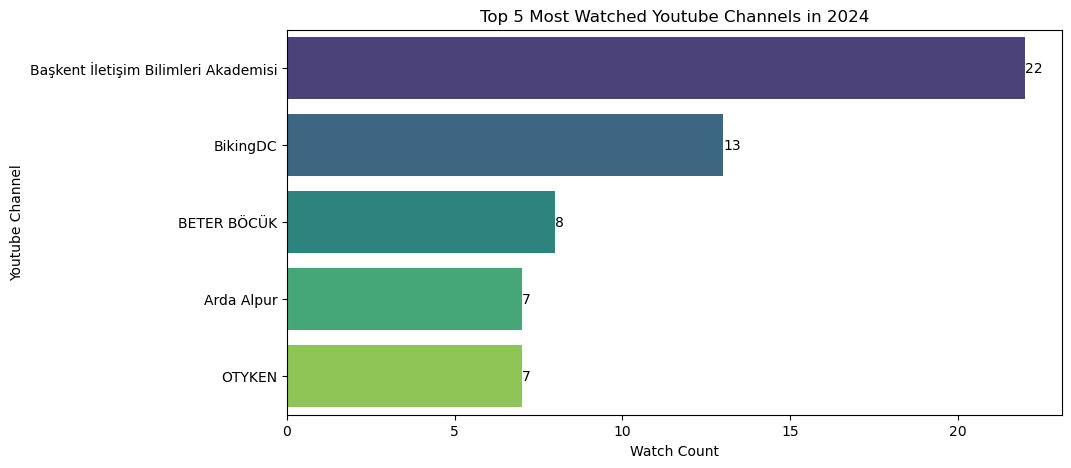

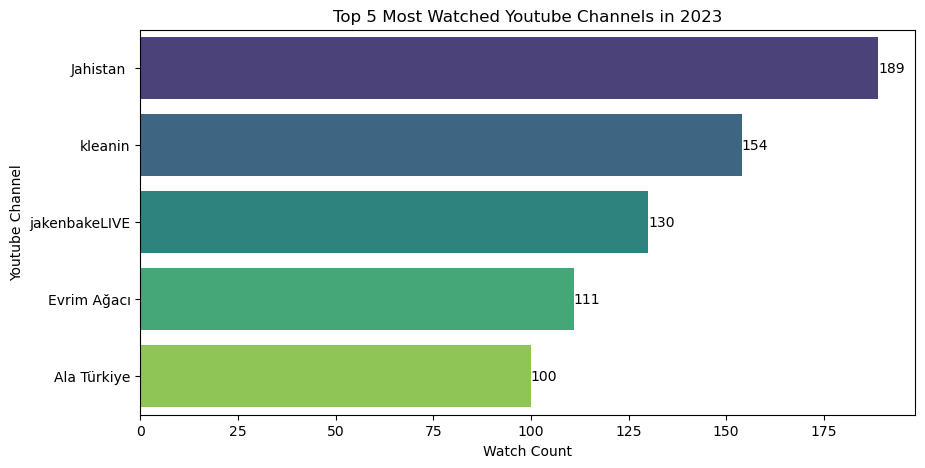

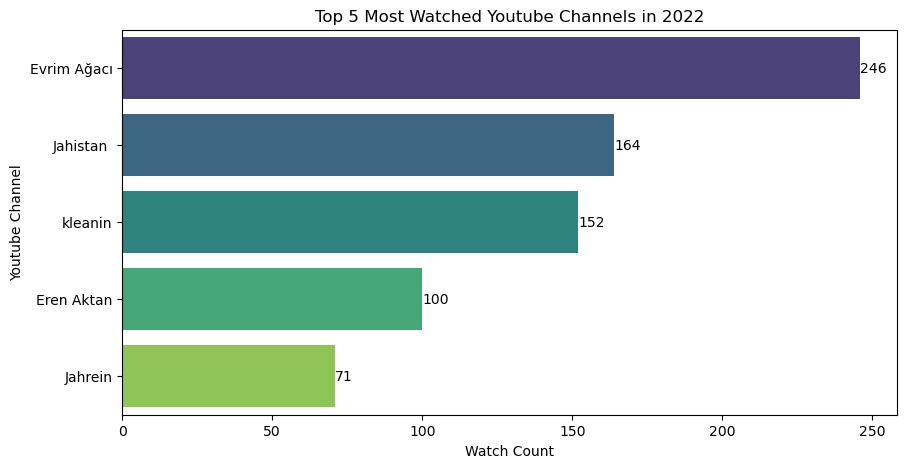

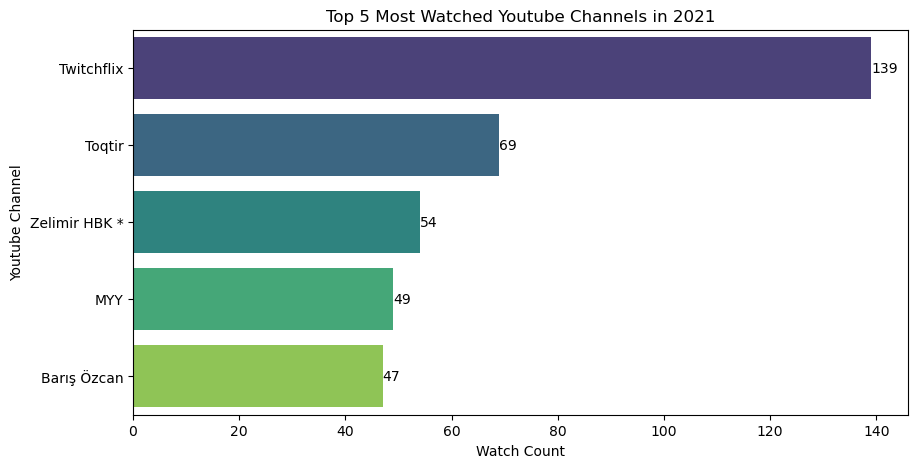

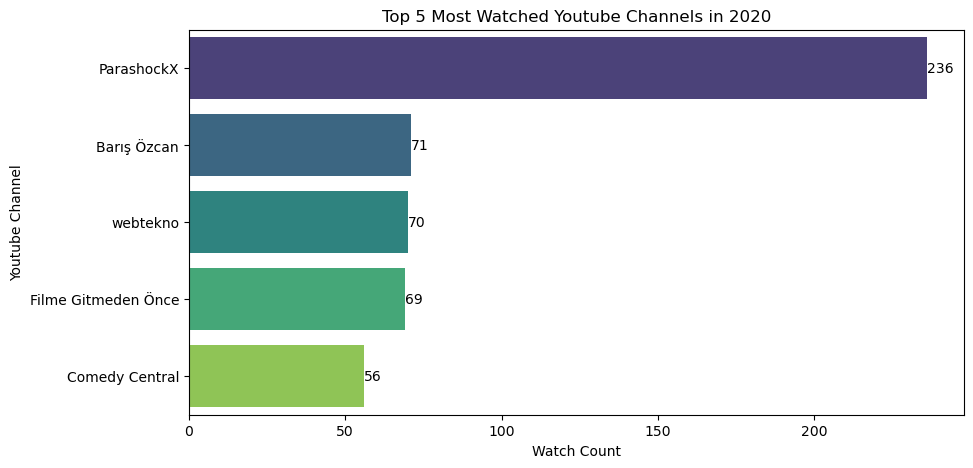

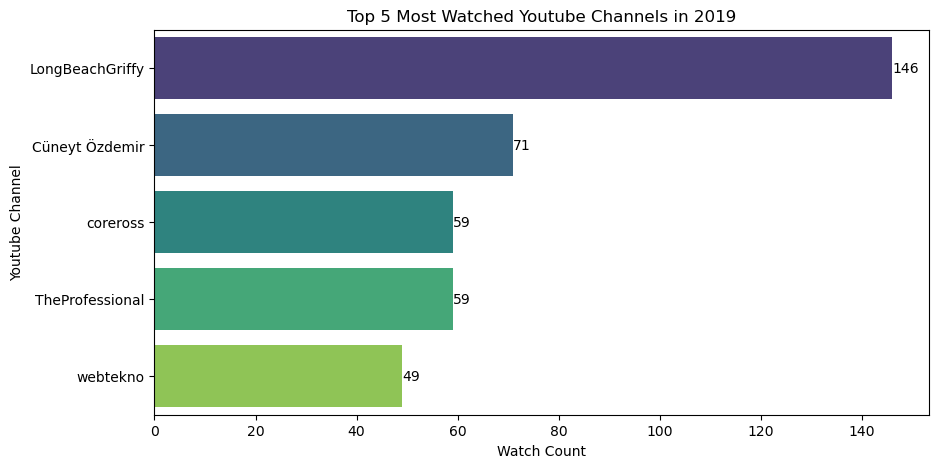

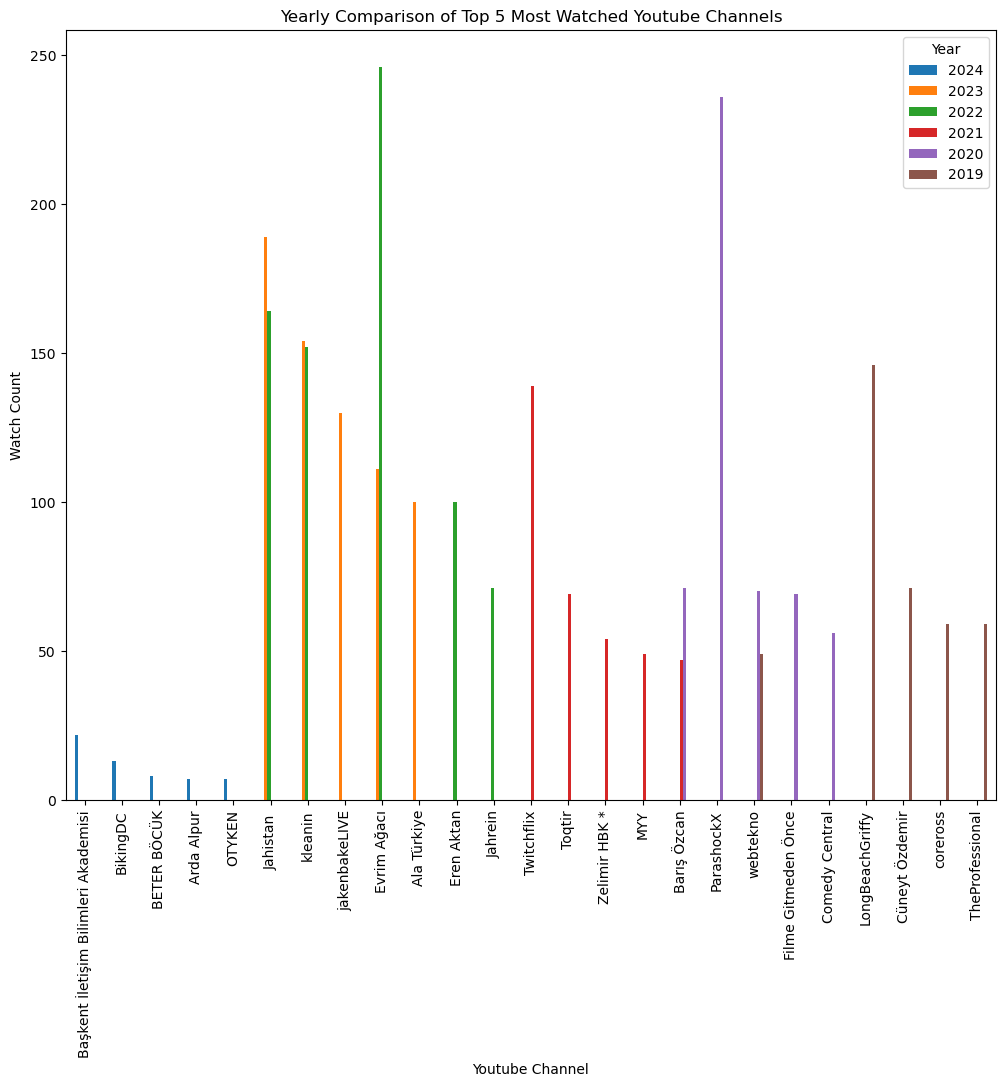

In [8]:
df['year'] = df['time'].dt.year
def plot_top_channels_per_year(df, year):
    # Filter the DataFrame for the given year
    df_year = df[df['year'] == year]
    
    # Count occurrences of each YouTube channel for the year and get the top 5
    channel_counts = df_year['Youtube Channel'].value_counts().head(5)

    # Plot the data using a horizontal bar chart
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=channel_counts, y=channel_counts.index, palette='viridis')

    # Set the labels and title of the plot
    ax.set(ylabel='Youtube Channel', xlabel='Watch Count', title=f'Top 5 Most Watched Youtube Channels in {year}')

    # Add the count labels on the bars
    ax.bar_label(ax.containers[0])

    # Display the plot
    plt.show()
for year in df['year'].unique():
    plot_top_channels_per_year(df, year)
# Creating a DataFrame to store channel watch counts per year
channel_watch_counts = pd.DataFrame()

for year in df['year'].unique():
    yearly_data = df[df['year'] == year]['Youtube Channel'].value_counts().head(5)
    channel_watch_counts = pd.concat([channel_watch_counts, yearly_data], axis=1)

channel_watch_counts.columns = df['year'].unique()

# Plotting the data
channel_watch_counts.plot(kind='bar', figsize=(12, 10), title='Yearly Comparison of Top 5 Most Watched Youtube Channels')

# Adding labels and legend
plt.xlabel('Youtube Channel')
plt.ylabel('Watch Count')
plt.legend(title='Year')
plt.show()


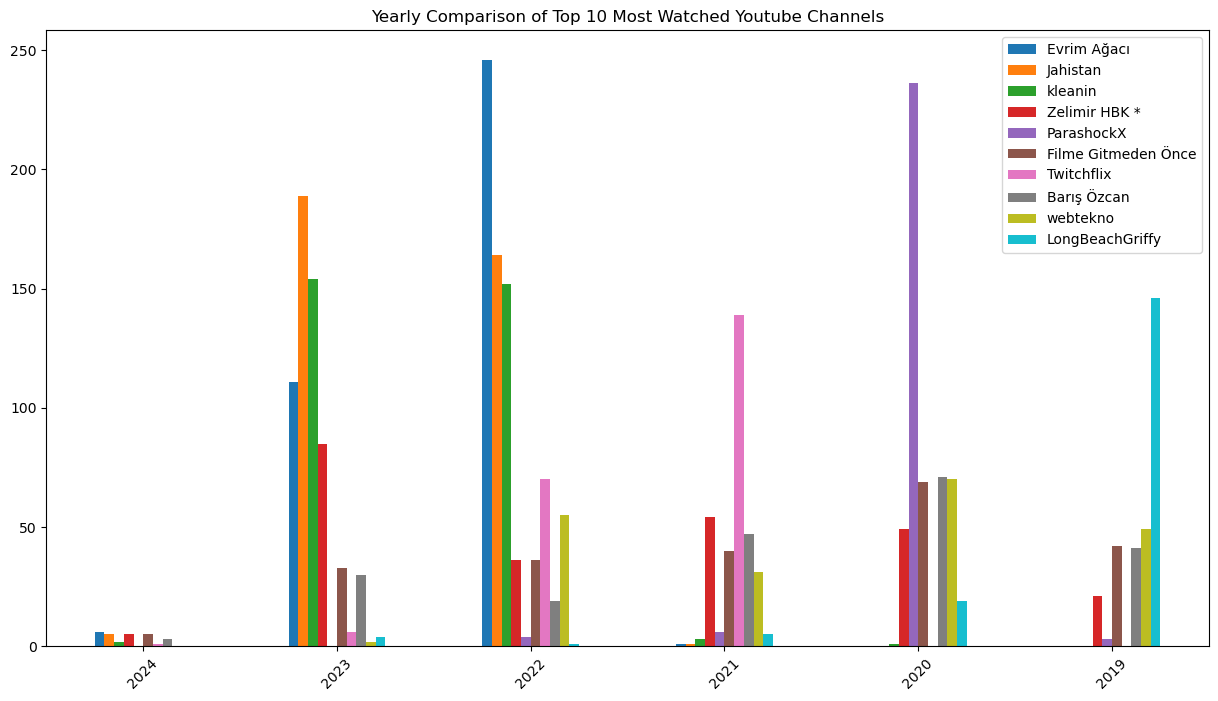

In [9]:
top_10_channels = df['Youtube Channel'].value_counts().head(10).index
# Initialize a DataFrame to hold the watch counts
channel_watch_counts = pd.DataFrame()

# Iterate over each year
for year in df['year'].unique():
    # Filter the DataFrame for the specific year and top channels
    df_year = df[(df['year'] == year) & (df['Youtube Channel'].isin(top_10_channels))]
    
    # Count occurrences for the year and align with top channels
    yearly_counts = df_year['Youtube Channel'].value_counts().reindex(top_10_channels, fill_value=0)
    
    # Add this as a column to the channel_watch_counts DataFrame
    channel_watch_counts[year] = yearly_counts

# Transpose the DataFrame for plotting
channel_watch_counts = channel_watch_counts.T
# Plotting the data
channel_watch_counts.plot(kind='bar', figsize=(15, 8), title='Yearly Comparison of Top 10 Most Watched Youtube Channels')

# Define the width of the bars
bar_width = 0.7

# Get the number of groups and the total number of bars per group
n_groups = len(channel_watch_counts.index)
total_bars = len(channel_watch_counts.columns)

# Calculate the width of each bar
individual_bar_width = bar_width / total_bars

# Plotting the data with wider bars
#fig, ax = plt.subplots(figsize=(15, 8))
for i, channel in enumerate(channel_watch_counts.columns):
    ax.bar(np.arange(n_groups) + i * individual_bar_width, channel_watch_counts[channel], 
           width=individual_bar_width, label=channel)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Watch Count')
ax.set_title('Yearly Comparison of Top 10 Most Watched Youtube Channels')
ax.set_xticks(np.arange(n_groups) + bar_width / 2)
ax.set_xticklabels(channel_watch_counts.index)
ax.legend(title='Youtube Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Display the plot
plt.show()



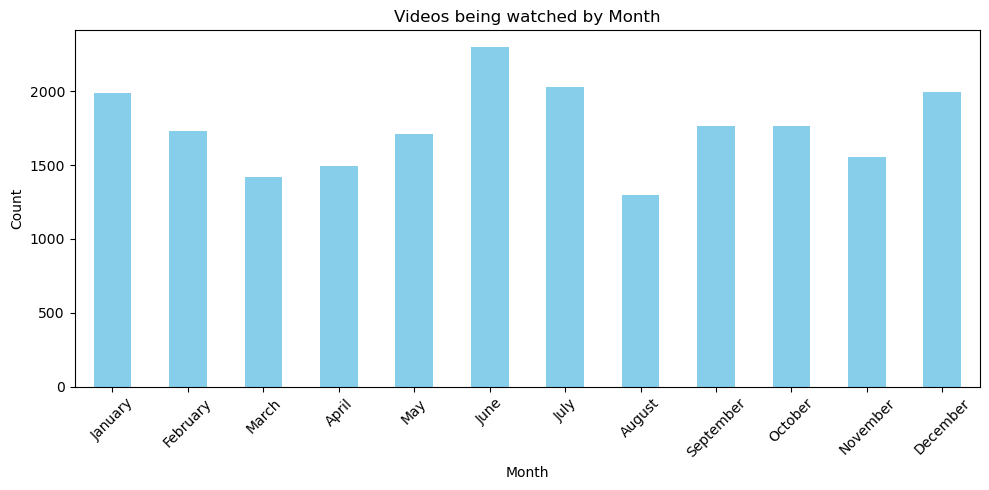

In [10]:
# Assuming df is your DataFrame and 'time' is the column with timestamps
df['month'] = df['time'].dt.month_name()  # Extract month name from the timestamp

# Group by the new 'month' column and count the occurrences
monthly_counts = df.groupby('month').size()

# Sort the months in calendar order since groupby will sort them alphabetically by default
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order)

# Plot
plt.figure(figsize=(10, 5))  # Adjust the size of the plot as needed
monthly_counts.plot(kind='bar', color='skyblue')  # You can choose your own color

plt.title('Videos being watched by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()

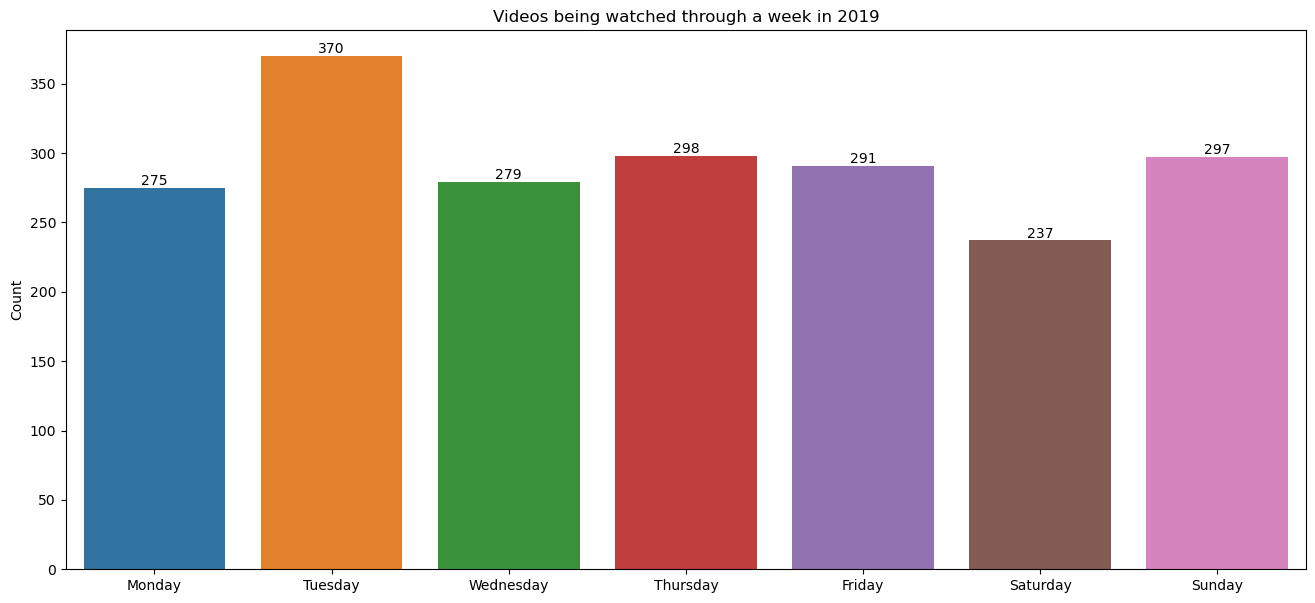

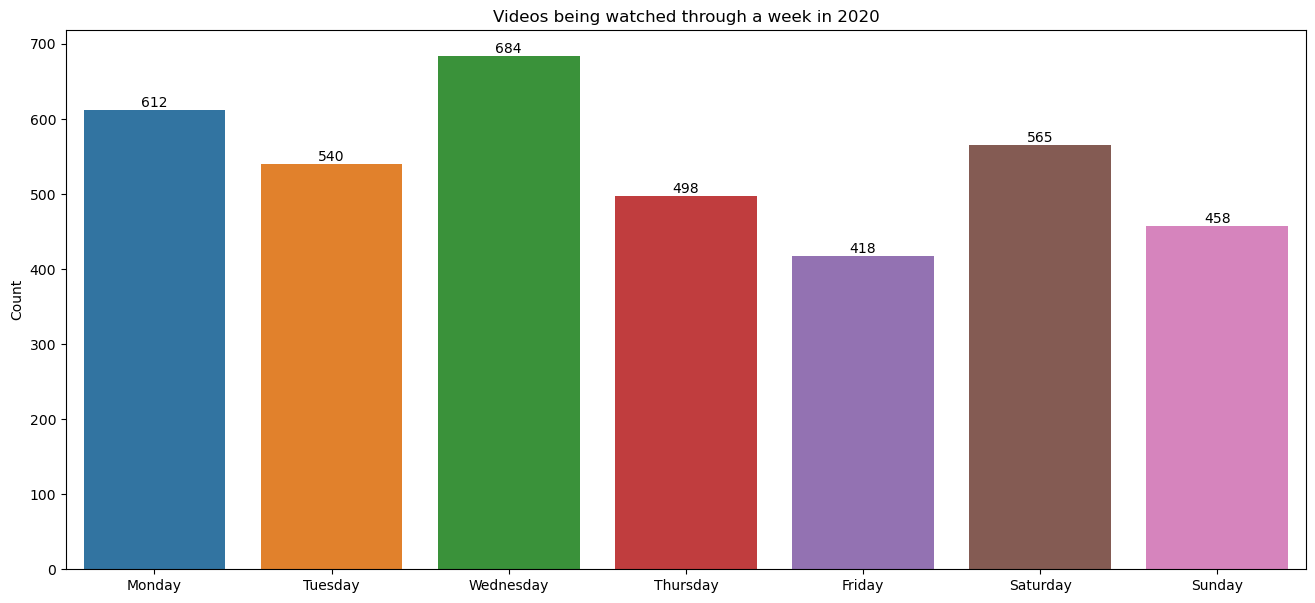

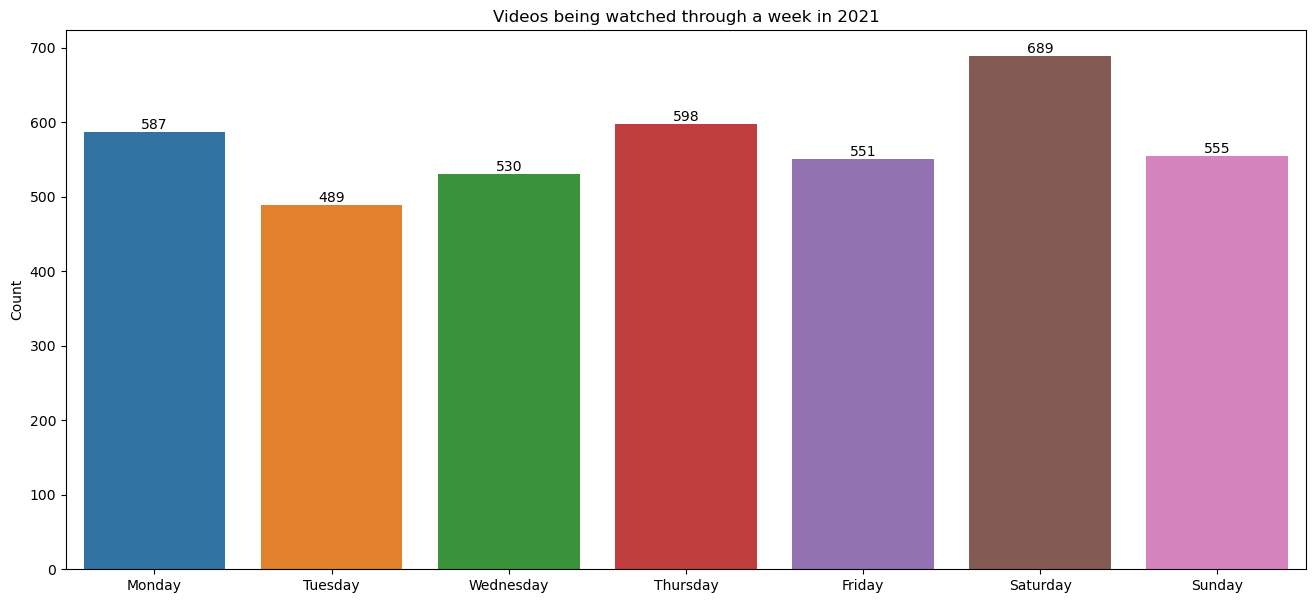

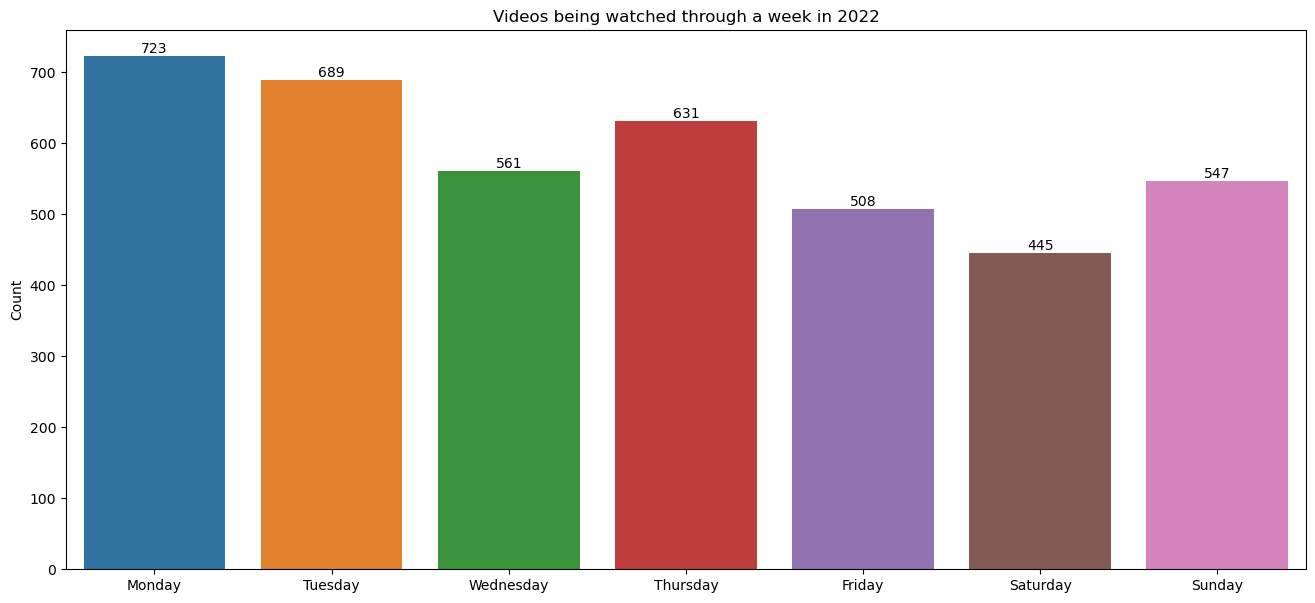

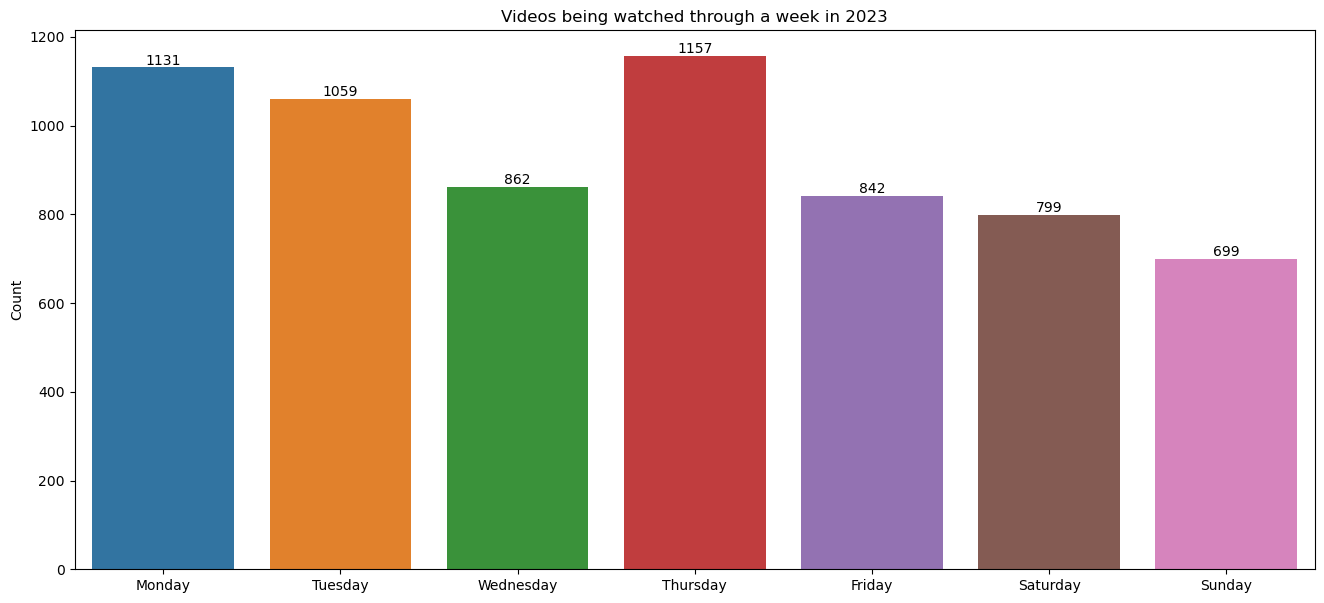

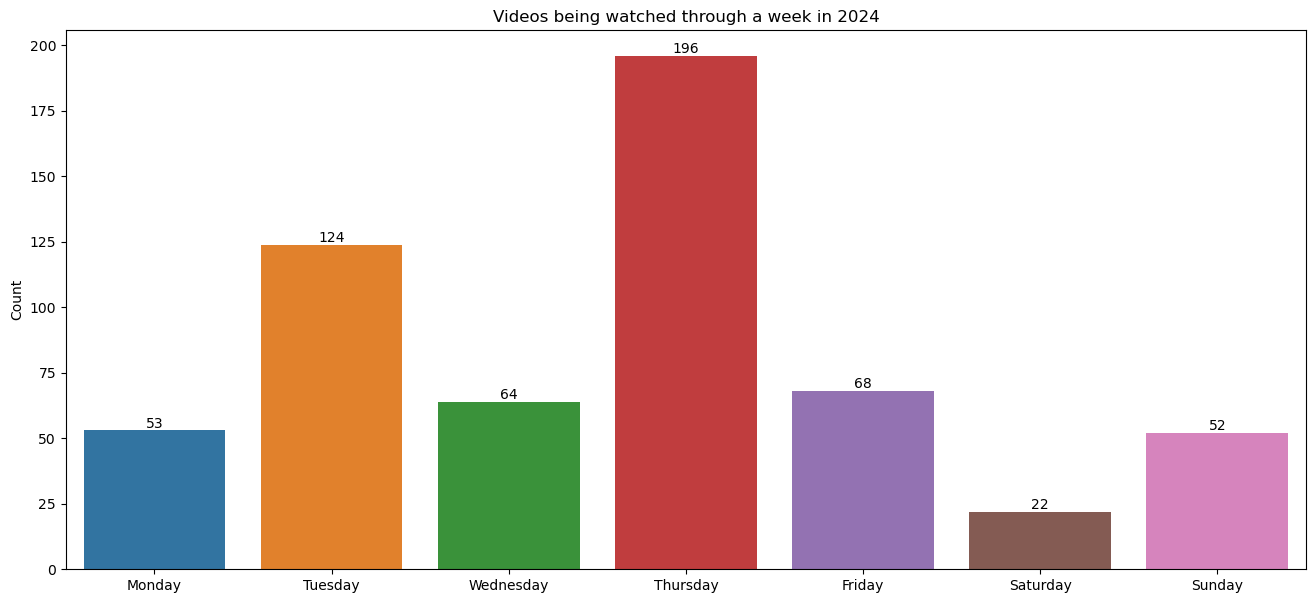

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'dayname' and 'time'

watch = pd.Categorical(df['dayname'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
watch = df['dayname'].groupby(watch).count()

# Iterate through years
for year in range(2019, 2025):
    # Filter DataFrame for the specific year
    df_year = df[df['time'].dt.year == year]

    # Calculate the count of each day for the specific year
    watch_year = pd.Categorical(df_year['dayname'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
    watch_year = df_year['dayname'].groupby(watch_year).count()

    plt.figure(figsize=(16, 7))
    ax = sns.barplot(y=watch_year, x=watch_year.index)
    ax.set(ylabel='Count', title=f'Videos being watched through a week in {year}')
    ax.bar_label(ax.containers[0])
    plt.show()


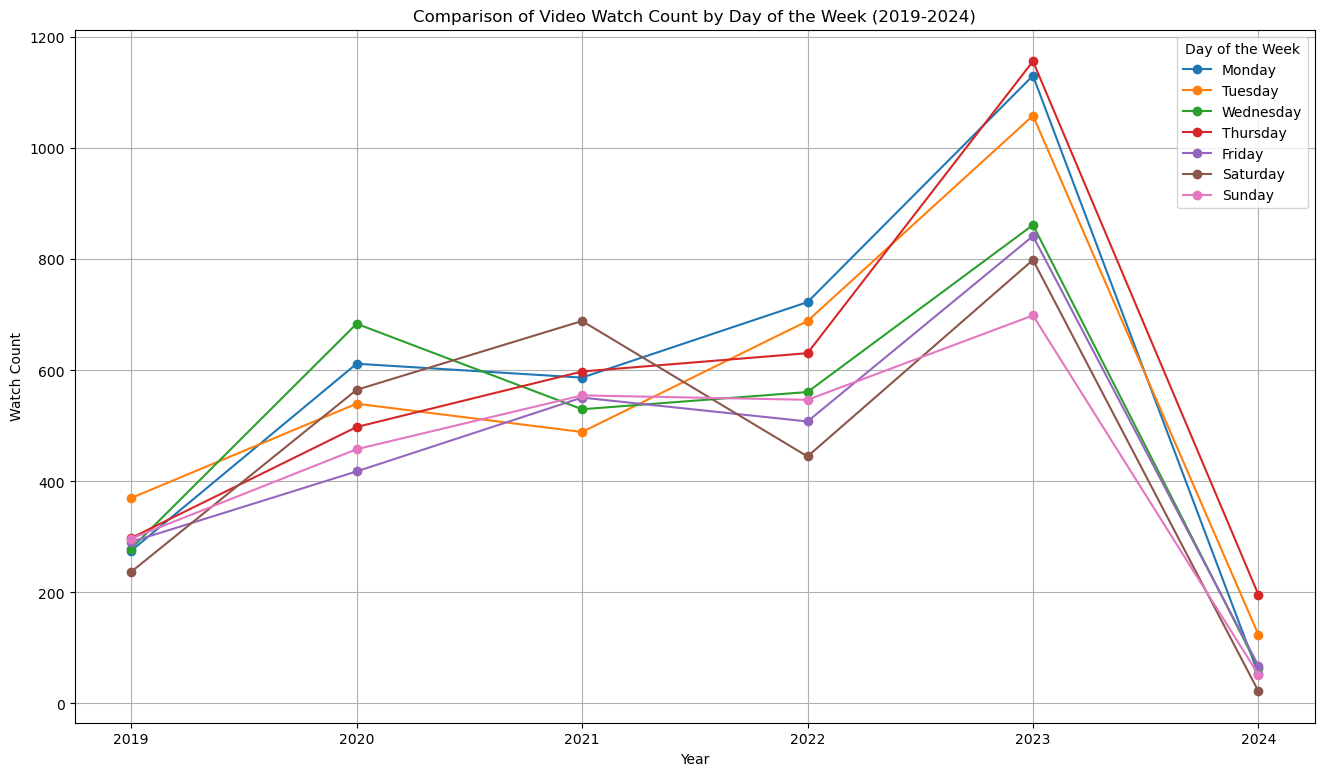

In [12]:
# Initialize a DataFrame to hold the counts
week_day_counts = pd.DataFrame()

# Iterate over each year
for year in range(2019, 2025):
    # Filter the DataFrame for the specific year
    df_year = df[df['time'].dt.year == year]
    
    # Calculate the count of each day for the specific year
    watch_year = pd.Categorical(df_year['dayname'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    watch_year_count = df_year['dayname'].groupby(watch_year).count()
    
    # Add this as a column to the week_day_counts DataFrame
    week_day_counts[year] = watch_year_count

# Transpose the DataFrame for plotting
week_day_counts = week_day_counts.T
# Plotting the data
plt.figure(figsize=(16, 9))
for day in week_day_counts.columns:
    plt.plot(week_day_counts.index, week_day_counts[day], marker='o', label=day)

# Adding labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Watch Count')
plt.title('Comparison of Video Watch Count by Day of the Week (2019-2024)')
plt.legend(title='Day of the Week')
plt.xticks(range(2019, 2025))
plt.grid(True)

# Display the plot
plt.show()


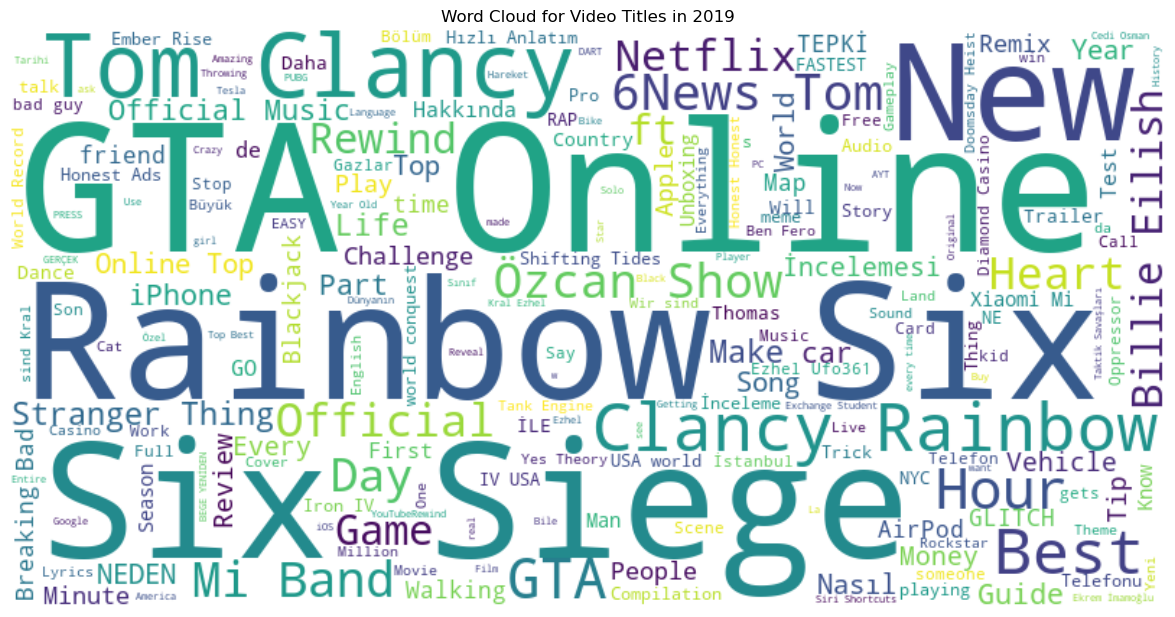

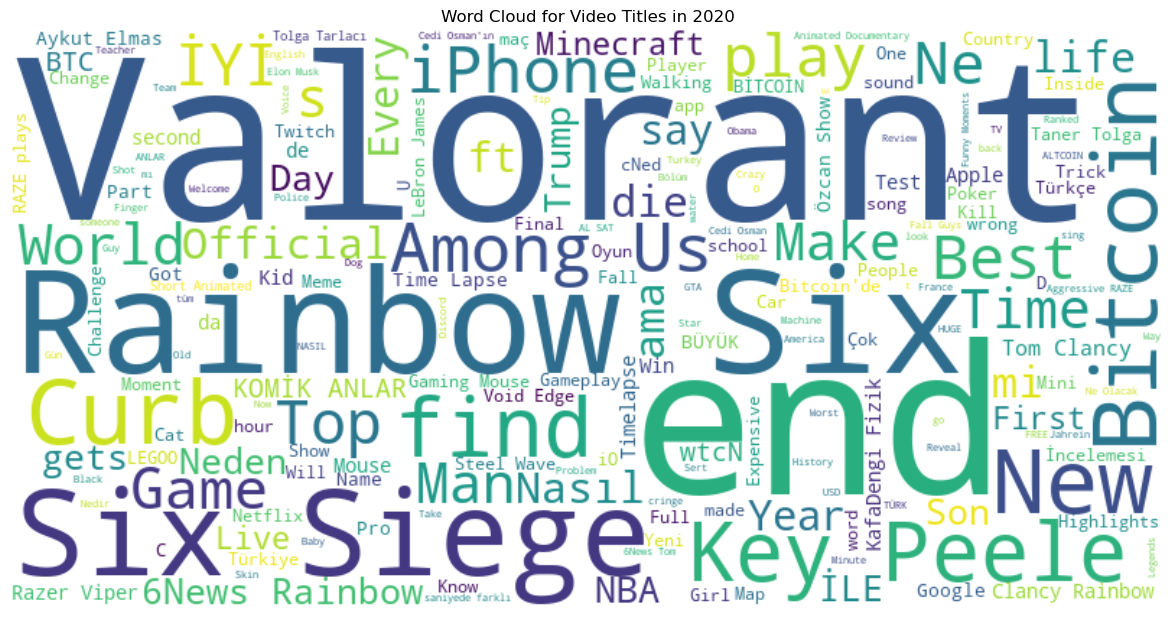

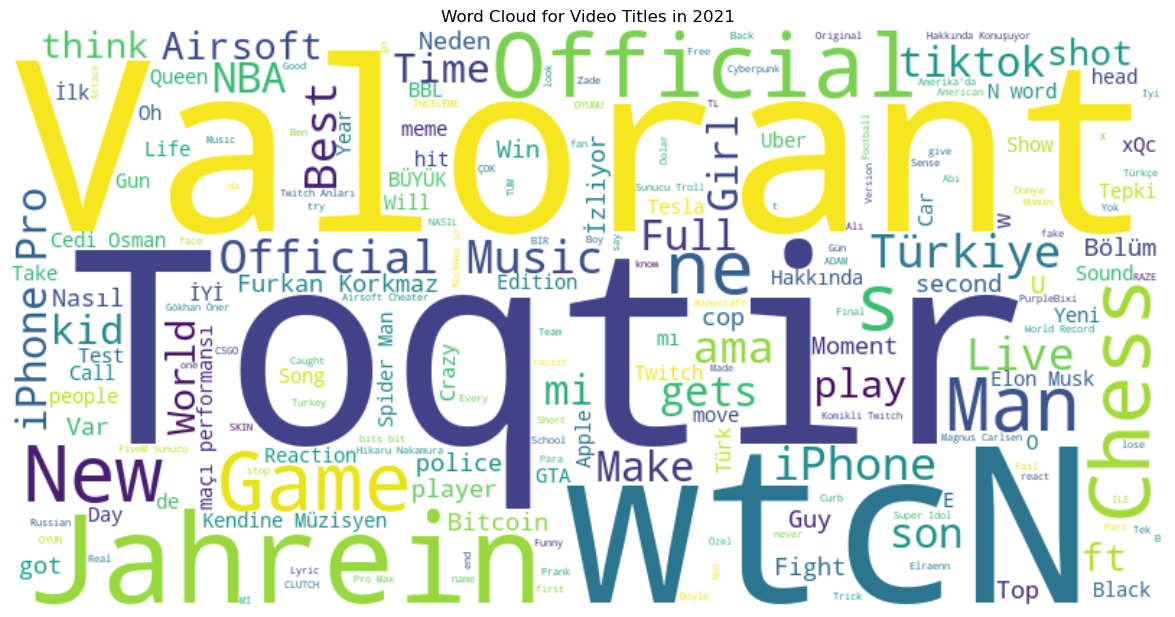

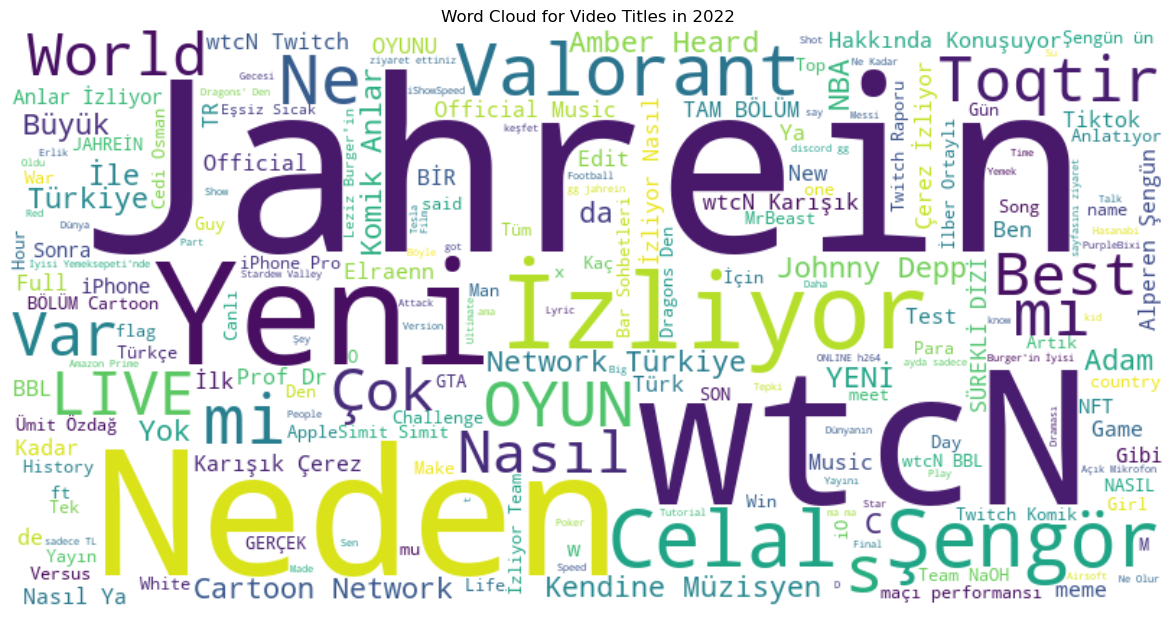

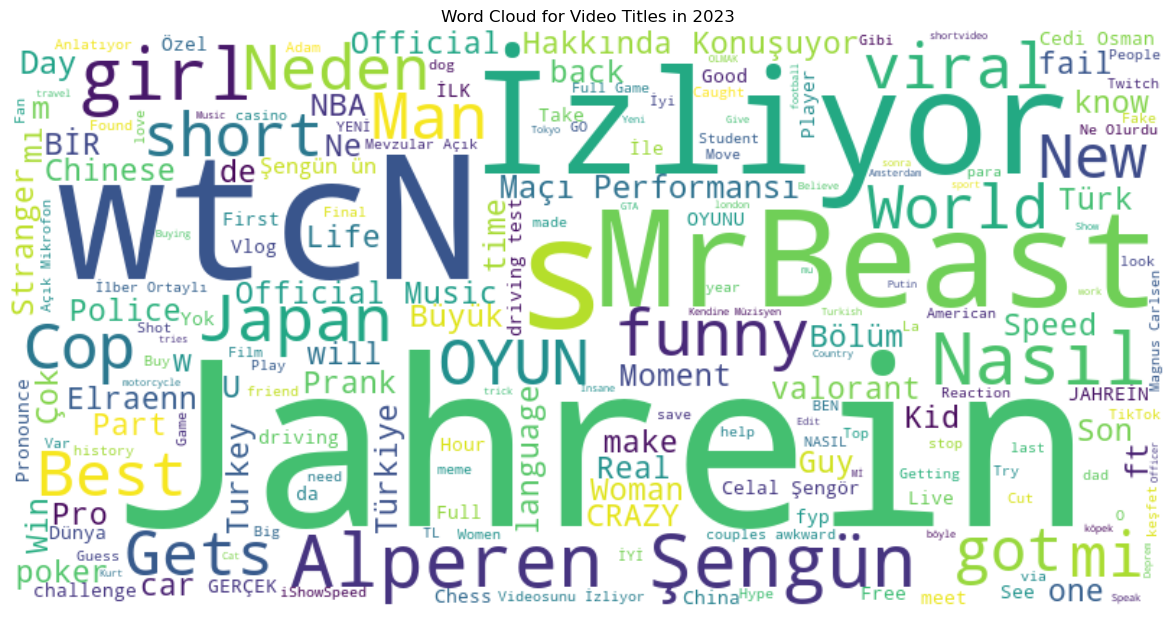

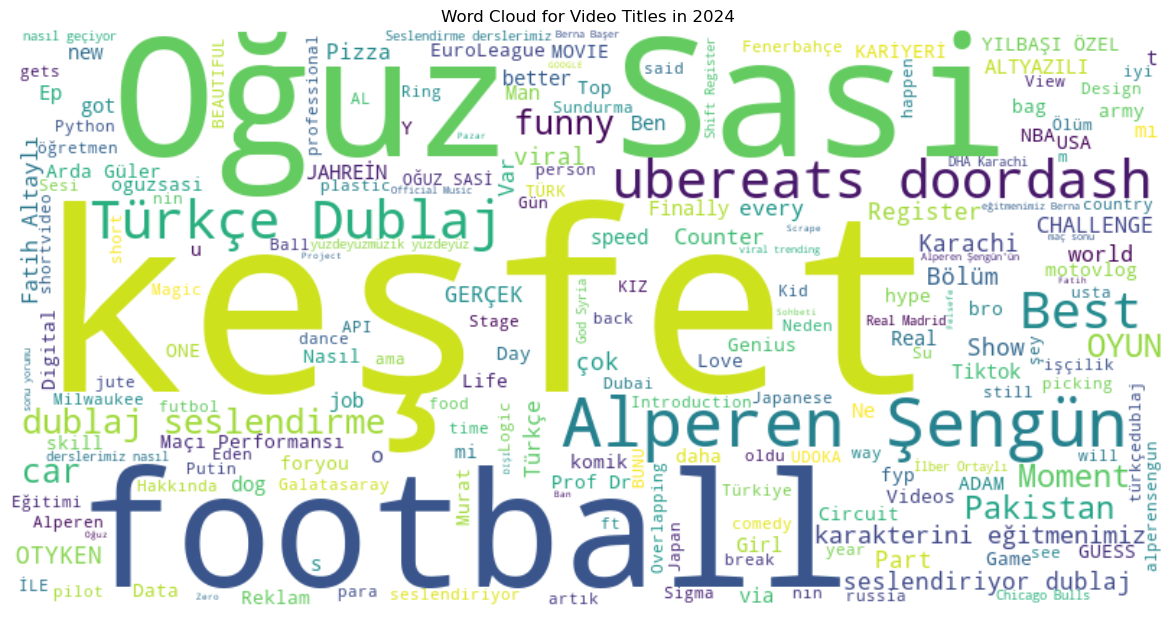

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load data
df = pd.read_json('watch_history31.json')

# Ensure 'time' is a datetime column
df['time'] = pd.to_datetime(df['time'])

# Define your stopwords
my_stopwords = set(STOPWORDS)
additional_stopwords = {'izlediniz', 'shorts', 'videoyu', 'adlı', 'ile', 'bir', 'bu', 've', 'en', '<', '>', 'youtube', 'https', 'watch', 'v', 'izlendi', 'kaldırılan', 'video', 'vs'}
my_stopwords.update(additional_stopwords)

# Loop through each year and create a word cloud
for year in range(2019, 2025):
    # Filter DataFrame for the specific year
    df_year = df[df['time'].dt.year == year]

    # Combine all titles into one large string for that year
    all_titles_year = ' '.join(df_year['title'].dropna())

    # Check if there are titles available for the year
    if all_titles_year:
        # Create the word cloud object with your custom stopwords
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=my_stopwords).generate(all_titles_year)

        # Display the word cloud using matplotlib
        plt.figure(figsize=(15, 7.5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Video Titles in {year}')
        plt.show()
    else:
        print(f"No titles available for the year {year}.")

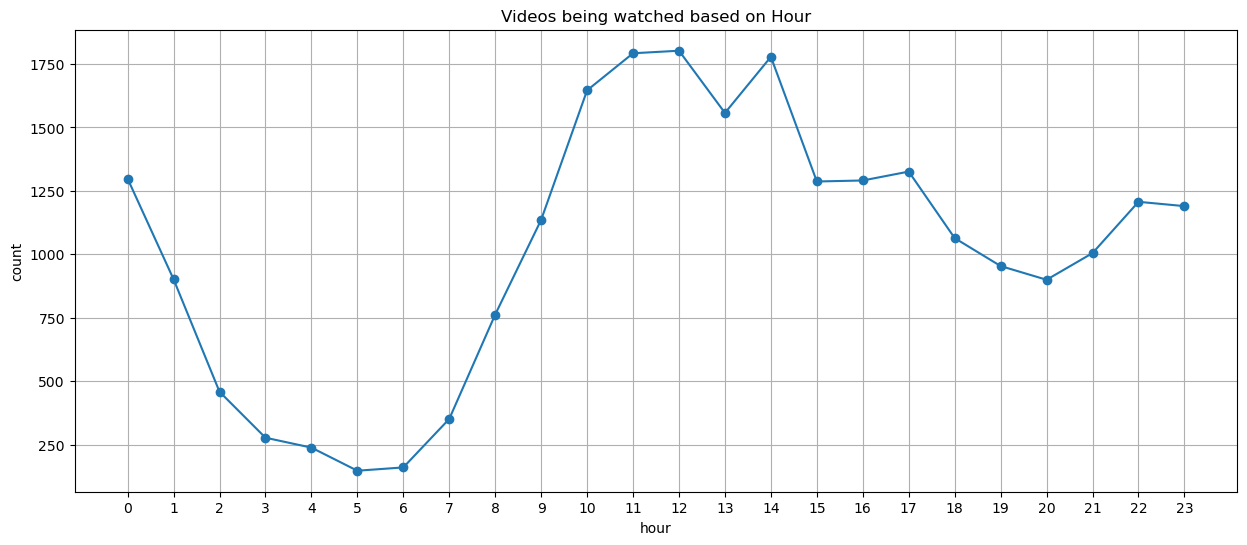

In [14]:
df['hour'] = df['time'].dt.hour  
df['hour_minute'] = df['time'].dt.strftime('%H:%M')
hourly_counts = df.groupby('hour').size()  

plt.figure(figsize=(15, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')  
plt.title('Videos being watched based on Hour')
plt.xlabel('hour')
plt.ylabel('count')
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()

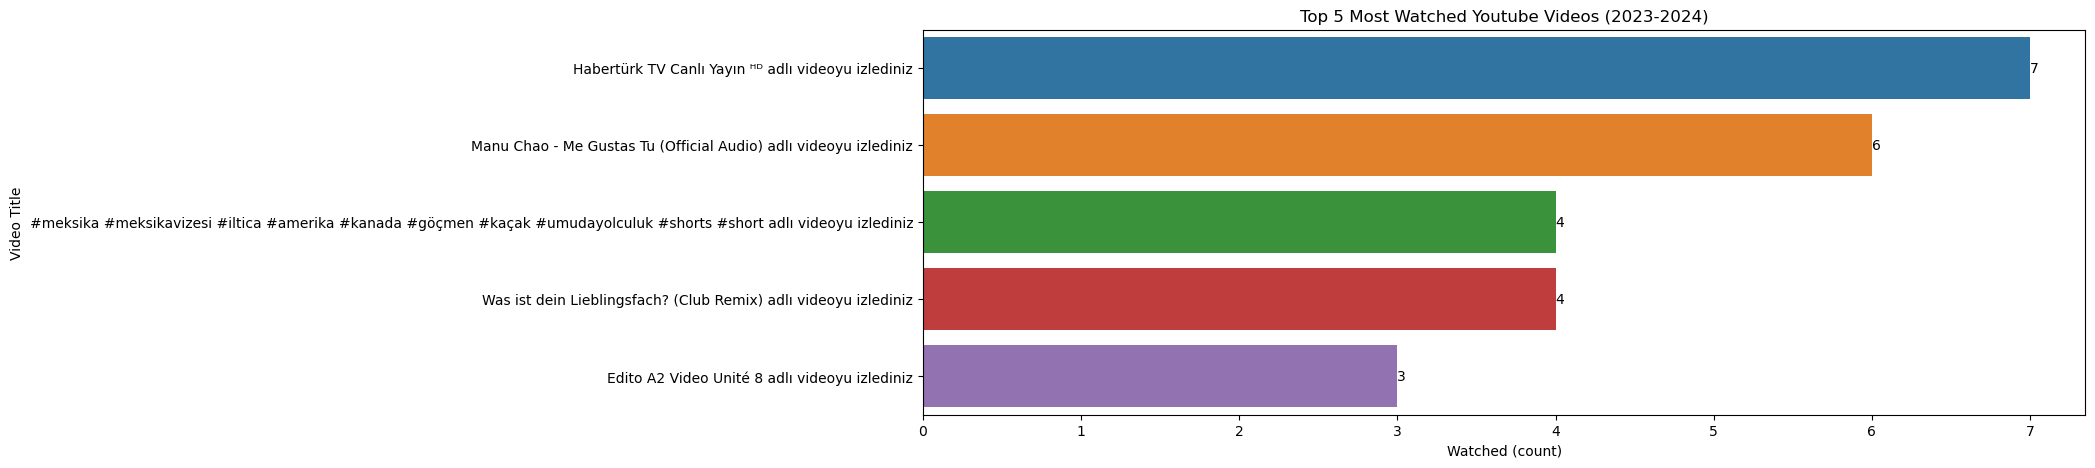

In [15]:
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame for the years 2023 to 2024
df_filtered = df[(df['time'].dt.year >= 2023) & (df['time'].dt.year <= 2024)]

# Titles to exclude (replace with actual titles you want to exclude)
titles_to_exclude = ['Kaldırılan bir video izlendi', 'Anket sorusu yanıtlandı', 'Title 3']  # Update this list

# Filter out the titles to exclude
df_filtered = df_filtered[~df_filtered['title'].isin(titles_to_exclude)]

# Group by title and count the number of watches
most_watch = df_filtered['title'].groupby(df_filtered['title']).count()
most_watch = most_watch.sort_values(ascending=False).head(5)  # Top 3 most watched

# Plotting
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=most_watch, y=most_watch.index)
ax.set(ylabel='Video Title', xlabel='Watched (count)', title='Top 5 Most Watched Youtube Videos (2023-2024)')
ax.bar_label(ax.containers[0])
plt.show()

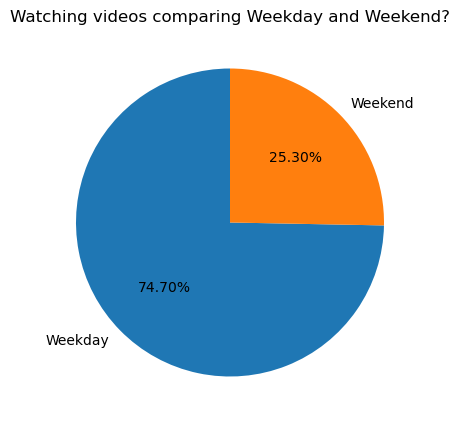

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'time' is a datetime column
df['time'] = pd.to_datetime(df['time'])

# Create a 'weekend' column: True if the day is a weekend, False otherwise
df['weekend'] = df['time'].dt.day_name().isin(['Saturday', 'Sunday'])

# Count the number of views on weekends and weekdays
sum_weekend = df['weekend'].sum()  # Count True values for weekend
sum_weekday = df.shape[0] - sum_weekend  # Subtract weekend count from total to get weekday count

# Values for the pie chart
pie_values = [sum_weekday, sum_weekend]
pie_labels = ['Weekday', 'Weekend']

# Plotting
plt.figure(figsize=(5, 5))
plt.title('Watching videos comparing Weekday and Weekend?')
plt.pie(pie_values, labels=pie_labels, autopct='%1.2f%%', startangle=90)
plt.show()

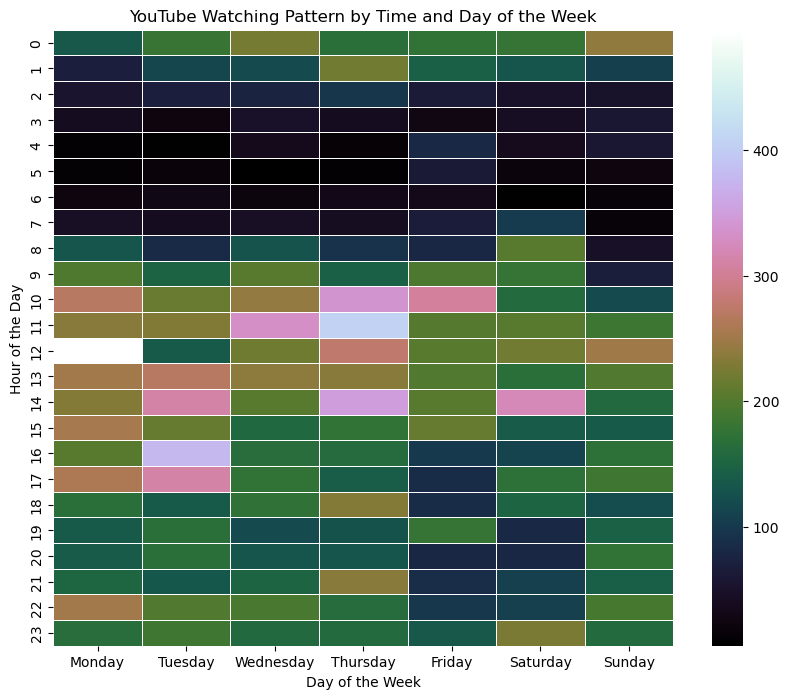

In [17]:
# Assuming 'time' is a datetime column in your DataFrame
df['time'] = pd.to_datetime(df['time'])

# Extract hour and day of the week
df['hour'] = df['time'].dt.hour
df['dayname'] = df['time'].dt.day_name()

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dayname'] = pd.Categorical(df['dayname'], categories=day_order, ordered=True)

# Group by 'hour' and 'dayname' and count the number of videos watched
hour_dayname_count = df.groupby(['hour', 'dayname']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hour_dayname_count, cmap='cubehelix', linewidths=.5)
plt.title('YouTube Watching Pattern by Time and Day of the Week')
plt.ylabel('Hour of the Day')
plt.xlabel('Day of the Week')
plt.show()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=147030581300-cec2pvtao335sf9594svv20828dba6lj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A60195%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=0oVaJKZmtXA0IJZpRXEIkyoTq4eOAV&access_type=offline


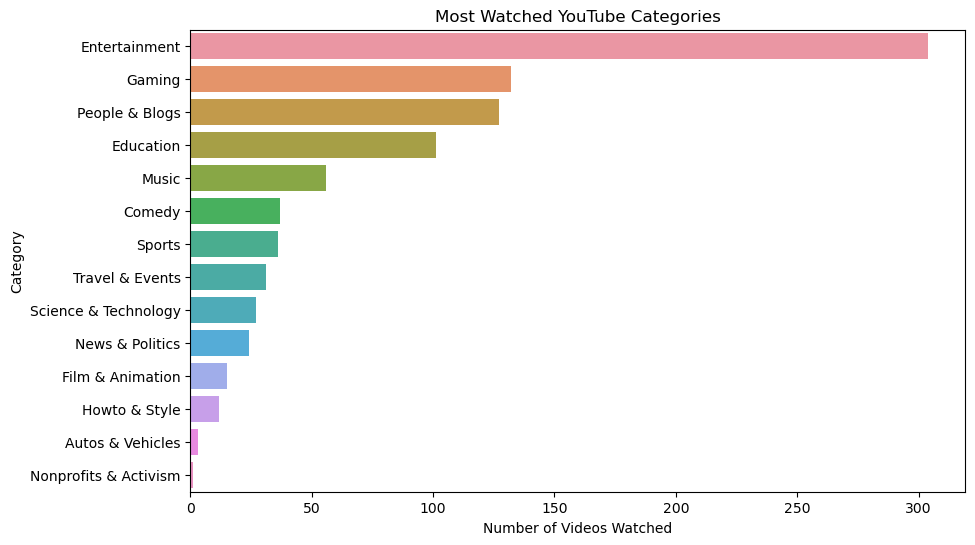

In [18]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

def main():
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "CLIENT_SECRET_FILE.json"

    # Get credentials and create an API client
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
    
    # Use a local server for the OAuth flow
    credentials = flow.run_local_server(port=0)

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

    # Fetch watched videos with a maximum of 400 results
    max_results = 3000
    next_page_token = None
    video_data = []
    
    while max_results > 0:
        watched_videos_request = youtube.videos().list(
            part="snippet,contentDetails",
            myRating="like",
            maxResults=min(50, max_results),  # Fetch up to 50 videos at a time
            pageToken=next_page_token
        )
        watched_videos_response = watched_videos_request.execute()

        # Extract video IDs and category IDs
        for item in watched_videos_response.get("items", []):
            video_id = item["id"]
            category_id = item["snippet"]["categoryId"]
            video_data.append({"video_id": video_id, "category_id": category_id})

        # Check if there are more results
        next_page_token = watched_videos_response.get("nextPageToken")
        if not next_page_token:
            break

        max_results -= 25

    # Convert to DataFrame
    df_videos = pd.DataFrame(video_data)

    # Fetch category names
    category_names = {}
    for category_id in df_videos['category_id'].unique():
        category_request = youtube.videoCategories().list(
            part="snippet",
            id=category_id
        )
        category_response = category_request.execute()

        category_name = category_response["items"][0]["snippet"]["title"]
        category_names[category_id] = category_name

    # Map category IDs to names
    df_videos['category_name'] = df_videos['category_id'].map(category_names)

    # Count the occurrences of each category
    category_counts = df_videos['category_name'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.values, y=category_counts.index)
    plt.xlabel('Number of Videos Watched')
    plt.ylabel('Category')
    plt.title('Most Watched YouTube Categories')
    plt.show()

if __name__ == "__main__":
    main()


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=147030581300-cec2pvtao335sf9594svv20828dba6lj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A60209%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=lkB4tEZ01Wc03mgWk5KNPd63YaPQoR&access_type=offline


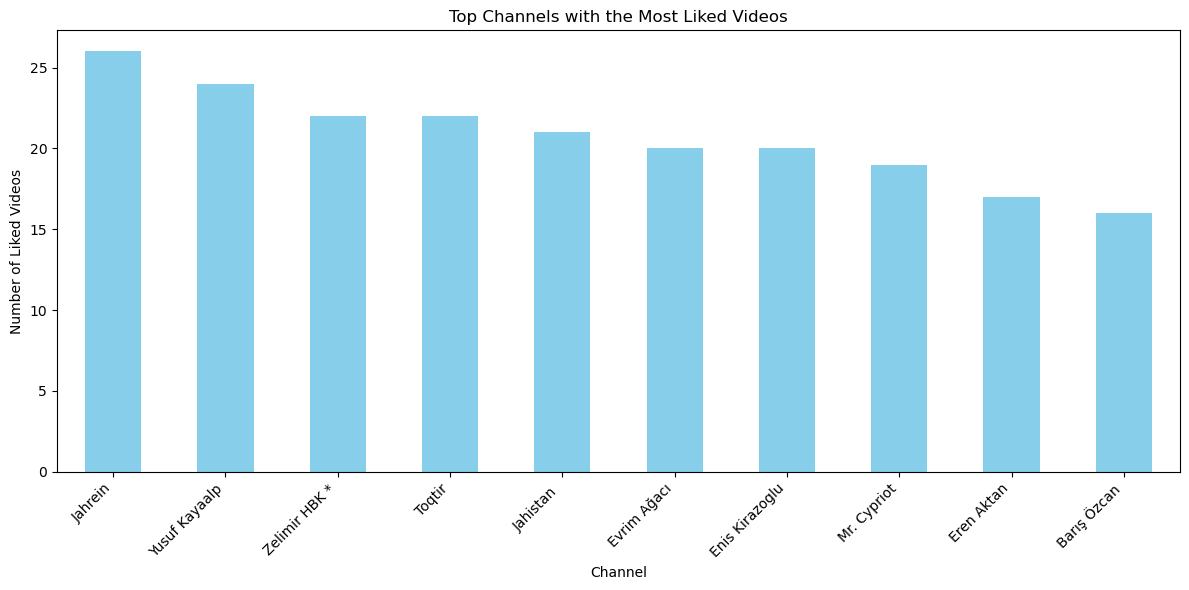

In [19]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd
import matplotlib.pyplot as plt

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

def main():
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "CLIENT_SECRET_FILE.json"

    # Get credentials and create an API client
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
    
    # Use a local server for the OAuth flow
    credentials = flow.run_local_server(port=0)

    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

    # Fetch liked videos
    liked_videos = []
    next_page_token = None
    
    while True:
        liked_videos_request = youtube.videos().list(
            part="snippet",
            myRating="like",
            maxResults=25,  # Fetch up to 50 liked videos at a time
            pageToken=next_page_token
        )
        liked_videos_response = liked_videos_request.execute()

        # Extract liked videos and their channels
        for item in liked_videos_response.get("items", []):
            snippet = item["snippet"]
            video_id = item["id"]
            channel_title = snippet["channelTitle"]
            
            liked_videos.append({"video_id": video_id, "channel_title": channel_title})

        # Check if there are more results
        next_page_token = liked_videos_response.get("nextPageToken")
        if not next_page_token:
            break

    # Convert to DataFrame
    df_liked_videos = pd.DataFrame(liked_videos)

    # Count the number of liked videos from each channel
    channel_like_counts = df_liked_videos['channel_title'].value_counts()

    # Select the top N channels with the most liked videos for the bar chart
    top_channels = channel_like_counts.head(10)  # You can adjust the number of channels to display

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    top_channels.plot(kind='bar', color='skyblue')
    plt.xlabel("Channel")
    plt.ylabel("Number of Liked Videos")
    plt.title("Top Channels with the Most Liked Videos")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=147030581300-cec2pvtao335sf9594svv20828dba6lj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A60222%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=E7ipFA4RU0JTwEfdeMsIhBWWIRCm7b&access_type=offline


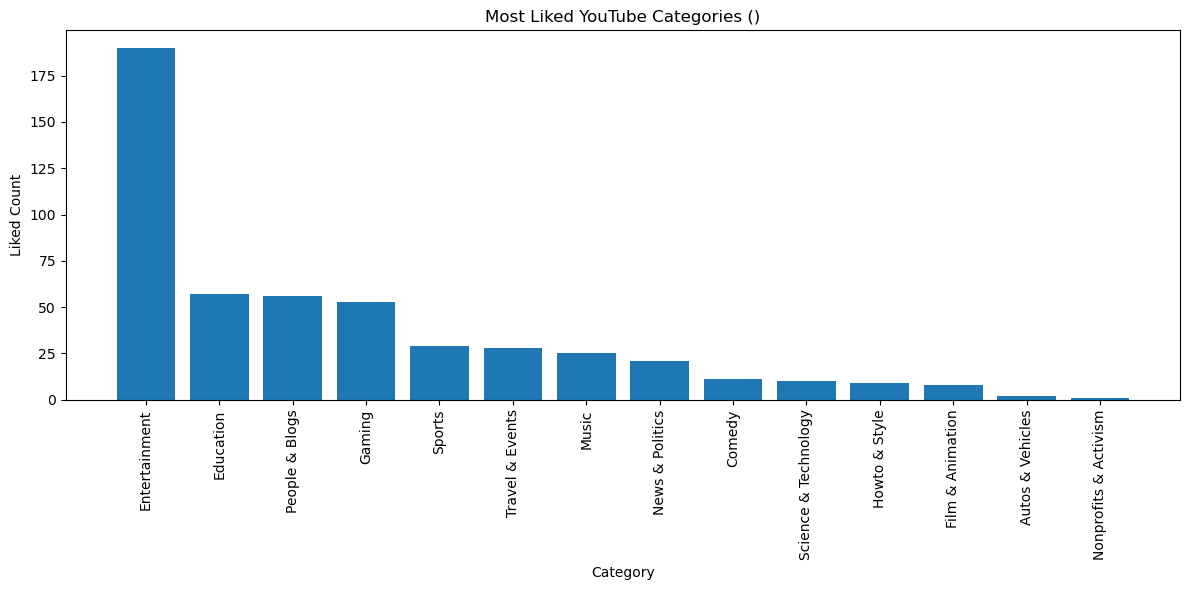

In [20]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import matplotlib.pyplot as plt

# Set up YouTube API credentials and authenticate
scopes = ["https://www.googleapis.com/auth/youtube.readonly"]
os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"
api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "CLIENT_SECRET_FILE.json"  # Replace with your client secrets file

flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
    client_secrets_file, scopes)
credentials = flow.run_local_server(port=0)
youtube = googleapiclient.discovery.build(api_service_name, api_version, credentials=credentials)

# Fetch liked videos with a maximum of 500
max_results = 500
liked_videos = []
next_page_token = None
while len(liked_videos) < max_results:
    liked_videos_request = youtube.videos().list(
        part="snippet",
        myRating="like",
        maxResults=min(50, max_results - len(liked_videos)),  # Fetch up to 50 liked videos at a time
        pageToken=next_page_token
    )
    liked_videos_response = liked_videos_request.execute()
    liked_videos.extend(liked_videos_response.get("items", []))

    next_page_token = liked_videos_response.get("nextPageToken")
    if not next_page_token or len(liked_videos) >= max_results:
        break

# Extract category information and count occurrences
category_counts = {}
for video in liked_videos:
    category_id = video["snippet"]["categoryId"]
    
    # Fetch category name using the category ID
    category_request = youtube.videoCategories().list(
        part="snippet",
        id=category_id
    )
    category_response = category_request.execute()
    
    # Extract category name
    category_name = category_response["items"][0]["snippet"]["title"]
    
    # Count occurrences of each category
    if category_name in category_counts:
        category_counts[category_name] += 1
    else:
        category_counts[category_name] = 1

# Sort the categories by count
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Extract category names and counts for the histogram
categories = [category[0] for category in sorted_categories]
counts = [category[1] for category in sorted_categories]

# Create a histogram chart
plt.figure(figsize=(12, 6))
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Liked Count')
plt.title('Most Liked YouTube Categories ()')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.tight_layout()

# Show the histogram chart
plt.show()
